# King County House Sales Regression Analysis
## Data Modeling

* Student name: Spencer Hadel
* Student pace: Flex
* Scheduled project review date/time: 5/5/2022, 11:00am EST
* Instructor name: Claude Fried

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.metrics import mean_squared_error

### Import Prepared Data from kc_preprocessing_exploring.ipynb

We have already preprocessed our data in the kc_kc_preprocessing_exploring notebook:

[Preprocessing Notebook](./kc_preprocessing_exploring.ipynb)

In [2]:
df = pd.read_csv('./data/preprocessed.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   sqft_living          21534 non-null  float64
 2   sqft_lot             21534 non-null  float64
 3   yr_built             21534 non-null  float64
 4   bedrooms_10          21534 non-null  int64  
 5   bedrooms_11          21534 non-null  int64  
 6   bedrooms_2           21534 non-null  int64  
 7   bedrooms_3           21534 non-null  int64  
 8   bedrooms_33          21534 non-null  int64  
 9   bedrooms_4           21534 non-null  int64  
 10  bedrooms_5           21534 non-null  int64  
 11  bedrooms_6           21534 non-null  int64  
 12  bedrooms_7           21534 non-null  int64  
 13  bedrooms_8           21534 non-null  int64  
 14  bedrooms_9           21534 non-null  int64  
 15  bathrooms_0.75       21534 non-null 

In [4]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'yr_built',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'renovated_2000_1',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_13_Mansion',
 'grade_3_Poor',
 'grade_4_Low',
 'grade_5_Fair',
 'grade_6_Low_Average',
 'grade_7_Average',
 'grade_

## Split, Train and Test Data

Now that we have a complete preprocessed dataset, we need to split the data into train and test datasets, as well as identify the feature we are testing for: price.

In [5]:
predictors = df.drop('price', axis=1)
target = df['price']

X_train, X_test, y_train, y_test = train_test_split(predictors, target)

#check size of each
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16150, 67), (5384, 67), (16150,), (5384,))

In [6]:
X_1 = X_train
y = y_train

model_1 = sm.OLS(y, sm.add_constant(X_1)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     472.6
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        02:07:39   Log-Likelihood:                -14252.
No. Observations:               16150   AIC:                         2.864e+04
Df Residuals:                   16083   BIC:                         2.915e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7039      0.298      2.362      0.018       0.120       1.288
sqft_living             0.3762      0.010     36.228      0.000       0.356       0.397
sqft_lot               -0.0696      0.006    -12.323      0.000      -0.081      -0.059
yr_built               -0.2963      0.007    -41.458      0.000      -0.310      -0.282
bedrooms_10            -0.2413      0.419     -0.576      0.565      -1.062       0.580
bedrooms_11            -0.8097      0.589     -1.374      0.170      -1.965       0.346
bedrooms_2             -0.0919      0.052     -1.774      0.076      -0.193       0.010
bedrooms_3             -0.2999      0.052     -5.752      0.000      -0.402      -0.198
bedrooms_33             0.4290      0.589      0.729      0.466      -0.725       1.583
bedrooms_4             -0.3565      0.054     -6.659      0.000      -0.461      -0.252
bedrooms_5             -0.3542      0.056     -6.284      0.000      -0.465      -0.244
bedrooms_6             -0.4944      0.069     -7.158      0.000      -0.630      -0.359
bedrooms_7             -0.5633      0.127     -4.439      0.000      -0.812      -0.315
bedrooms_8             -0.2915      0.182     -1.604      0.109      -0.648       0.065
bedrooms_9             -0.6570      0.349     -1.883      0.060      -1.341       0.027
bathrooms_0_75          0.7272      0.305      2.381      0.017       0.128       1.326
bathrooms_1_0           0.5621      0.294      1.915      0.056      -0.013       1.138
bathrooms_1_25          0.7330      0.353      2.078      0.038       0.042       1.424
bathrooms_1_5           0.5597      0.294      1.903      0.057      -0.017       1.136
bathrooms_1_75          0.6481      0.294      2.205      0.027       0.072       1.224
bathrooms_2_0           0.6618      0.294      2.250      0.024       0.085       1.238
bathrooms_2_25          0.6837      0.294      2.324      0.020       0.107       1.260
bathrooms_2_5           0.6732      0.294      2.289      0.022       0.097       1.250
bathrooms_2_75          0.7480      0.295      2.539      0.011       0.171       1.325
bathrooms_3_0           0.7481      0.295      2.536      0.011       0.170       1.326
bathrooms_3_25          0.9012      0.296      3.049      0.002       0.322       1.481
bathrooms_3_5           0.9113      0.295      3.085      0.002       0.332       1.490
bathrooms_3_75          1.1046      0.299      3.689      0.000       0.518       1.692
bathrooms_4_0           0.9983      0.300      3.323      0.001       0.409       1.587
bathrooms_4_25          1.1207      0.306      3.663      0.000       0.521       1.720
bathrooms_4_5           0.9002      0.303      2.970      0.003       0.306       1.494
bathrooms_4_75          1.1436      0.326      3.503      0.000       0.504       1.784
bat

Next we train our model on the test data.

In [7]:
orig_model = LinearRegression()

# Fit the model on X_train_final and y_train
orig_model.fit(X_train, y_train)

orig_model.score(X_test, y_test)

0.6572481385537933

### Remove Uninfluential Features

The first issue with our model is the number of features. This much potential noise is likely not helping our model properly train itself on the relevant data.

In order to reduce the number of features, we will first use scikit-learn's feature_selection submodule to select only the most important features.

In [8]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_1)

# Instantiate and fit the selector
selector = RFECV(LinearRegression(), cv=ShuffleSplit(n_splits=3, test_size=0.25, random_state=0))
selector.fit(X_train_for_RFECV, y_train)

selected_features = []

# Relevant Features:
for index, col in enumerate(X_1.columns):
    if selector.support_[index] == True:
        selected_features.append(col)
        #print(col)

print(selected_features)

['sqft_living', 'sqft_lot', 'yr_built', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1_0', 'bathrooms_1_5', 'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_3_75', 'floors_3_0', 'renovated_2000_1', 'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good', 'grade_9_Better', 'condition_Fair', 'condition_Very_Good', 'view_EXCELLENT', 'view_NONE', 'waterfront_YES']


Now we rerun the model with only the feature_selector's most important features.

In [9]:
X_2 = X_train[selected_features]

model_2 = sm.OLS(y, sm.add_constant(X_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1097.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        02:07:48   Log-Likelihood:                -14348.
No. Observations:               16150   AIC:                         2.875e+04
Df Residuals:                   16121   BIC:                         2.898e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3989      0.030     45.943      0.000       1.339       1.459
sqft_living             0.3957      0.010     41.008      0.000       0.377       0.415
sqft_lot               -0.0774      0.005    -14.473      0.000      -0.088      -0.067
yr_built               -0.2955      0.006    -49.471      0.000      -0.307      -0.284
bedrooms_3             -0.2042      0.016    -12.820      0.000      -0.235      -0.173
bedrooms_4             -0.2513      0.019    -13.347      0.000      -0.288      -0.214
bedrooms_5             -0.2191      0.025     -8.708      0.000      -0.268      -0.170
bedrooms_6             -0.3112      0.046     -6.718      0.000      -0.402      -0.220
bathrooms_1_0          -0.0912      0.017     -5.263      0.000      -0.125      -0.057
bathrooms_1_5          -0.1028      0.020     -5.208      0.000      -0.141      -0.064
bathrooms_3_25          0.1756      0.030      5.923      0.000       0.118       0.234
bathrooms_3_5           0.1730      0.028      6.263      0.000       0.119       0.227
bathrooms_3_75          0.3530      0.056      6.275      0.000       0.243       0.463
floors_3_0              0.2864      0.030      9.479      0.000       0.227       0.346
renovated_2000_1        0.1601      0.035      4.543      0.000       0.091       0.229
grade_11_Excellent      0.4148      0.040     10.351      0.000       0.336       0.493
grade_12_Luxury         0.8906      0.078     11.443      0.000       0.738       1.043
grade_13_Mansion        1.6201      0.189      8.595      0.000       1.251       1.990
grade_4_Low            -2.3484      0.137    -17.107      0.000      -2.617      -2.079
grade_5_Fair           -2.1080      0.055    -38.334      0.000      -2.216      -2.000
grade_6_Low_Average    -1.7737      0.033    -54.049      0.000      -1.838      -1.709
grade_7_Average        -1.3176      0.026    -50.185      0.000      -1.369      -1.266
grade_8_Good           -0.8774      0.024    -35.977      0.000      -0.925      -0.830
grade_9_Better         -0.3774      0.025    -15.197      0.000      -0.426      -0.329
condition_Fair         -0.3515      0.051     -6.861      0.000      -0.452      -0.251
condition_Very_Good     0.1451      0.018      8.097      0.000       0.110       0.180
view_EXCELLENT          0.2564      0.051      5.002      0.000       0.156       0.357
view_NONE              -0.2220      0.018    -12.600      0.000      -0.257      -0.187
waterfront_YES          0.7071      0.070     10.170      0.000       0.571       0.843
==============================================================================
Omnibus:                       47.464   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.006
Skew:                         

This yielded approximately the same R squared score, which is good because it means the features we removed were in fact very inconsequential to the outcome of our model. It also removed any feature with a value above the threshold of 0.05, removing our need to do this manually.

### Investigate Multicollinearity

The Cond. No is 74.6, and since this is above 30 (which indicates strong multicollinearity) the next step is to check our features for multicollinearity, and remove any features that may be impacting each other in a way that trains our model incorrectly.

We can start by investigating multicollinearity the same way as the preprocessing step.

In [10]:
corr = X_2.corr()
corr > 0.8

,sqft_living,sqft_lot,yr_built,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1_0,bathrooms_1_5,bathrooms_3_25,...,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Fair,condition_Very_Good,view_EXCELLENT,view_NONE,waterfront_YES
sqft_living,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_5,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_6,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms_1_0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms_1_5,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms_3_25,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


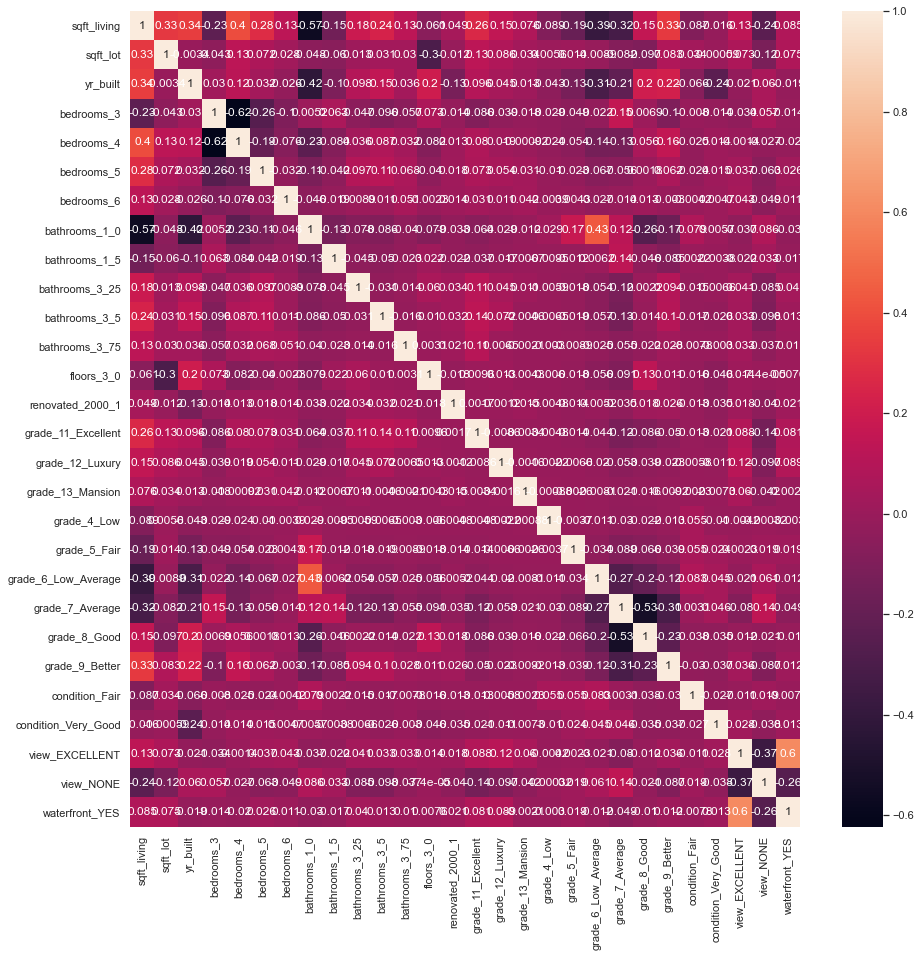

In [11]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corr, annot = True);

There are still a lot of features, making this hard to look at and understand at a galnce. So we will use statsmodels' variance_inflation_factor to look at this information more clearly.

In [12]:
vif = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif_scores = list(zip(X_2, vif))
vif_scores

[('sqft_living', 4.097168950482652),
 ('sqft_lot', 1.3208687267249186),
 ('yr_built', 1.6751110424922064),
 ('bedrooms_3', 4.6790993619671175),
 ('bedrooms_4', 4.672525340332765),
 ('bedrooms_5', 2.100167477458269),
 ('bedrooms_6', 1.2144557365042585),
 ('bathrooms_1_0', 2.3763431290740455),
 ('bathrooms_1_5', 1.2082317868623111),
 ('bathrooms_3_25', 1.1001414088758128),
 ('bathrooms_3_5', 1.1483782541116125),
 ('bathrooms_3_75', 1.0446189690677252),
 ('floors_3_0', 1.2075592544507772),
 ('renovated_2000_1', 1.0654839515981138),
 ('grade_11_Excellent', 1.2430597514763269),
 ('grade_12_Luxury', 1.074600425112599),
 ('grade_13_Mansion', 1.0209936035229155),
 ('grade_4_Low', 1.0467594432470082),
 ('grade_5_Fair', 1.3215128197882284),
 ('grade_6_Low_Average', 3.1620863006691784),
 ('grade_7_Average', 7.659389930843732),
 ('grade_8_Good', 4.258398778073271),
 ('grade_9_Better', 2.211995635015017),
 ('condition_Fair', 1.0291204847643072),
 ('condition_Very_Good', 1.1803366224345222),
 ('view

In [13]:
new_features = [x for x,vif in vif_scores if vif < 5]
new_features

['sqft_living',
 'sqft_lot',
 'yr_built',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1_0',
 'bathrooms_1_5',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'floors_3_0',
 'renovated_2000_1',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_13_Mansion',
 'grade_4_Low',
 'grade_5_Fair',
 'grade_6_Low_Average',
 'grade_8_Good',
 'grade_9_Better',
 'condition_Fair',
 'condition_Very_Good',
 'view_EXCELLENT',
 'waterfront_YES']

Now that we have checked for uninfluential features as well as features potentially causing multicollinearity, we run the tests again.

In [14]:
X_3 = X_train[new_features]

model_3 = sm.OLS(y, sm.add_constant(X_3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     916.8
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        02:08:00   Log-Likelihood:                -15629.
No. Observations:               16150   AIC:                         3.131e+04
Df Residuals:                   16123   BIC:                         3.152e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1534      0.019      8.287      0.000       0.117       0.190
sqft_living             0.6197      0.009     66.115      0.000       0.601       0.638
sqft_lot               -0.0673      0.006    -11.627      0.000      -0.079      -0.056
yr_built               -0.2537      0.006    -40.363      0.000      -0.266      -0.241
bedrooms_3             -0.3115      0.017    -18.218      0.000      -0.345      -0.278
bedrooms_4             -0.3930      0.020    -19.500      0.000      -0.432      -0.353
bedrooms_5             -0.4225      0.027    -15.702      0.000      -0.475      -0.370
bedrooms_6             -0.5717      0.050    -11.465      0.000      -0.669      -0.474
bathrooms_1_0          -0.0144      0.019     -0.772      0.440      -0.051       0.022
bathrooms_1_5          -0.0943      0.021     -4.418      0.000      -0.136      -0.052
bathrooms_3_25          0.3377      0.032     10.578      0.000       0.275       0.400
bathrooms_3_5           0.3367      0.030     11.331      0.000       0.278       0.395
bathrooms_3_75          0.5460      0.061      8.987      0.000       0.427       0.665
floors_3_0              0.4054      0.033     12.430      0.000       0.341       0.469
renovated_2000_1        0.2168      0.038      5.685      0.000       0.142       0.292
grade_11_Excellent      1.1027      0.041     26.912      0.000       1.022       1.183
grade_12_Luxury         1.4676      0.083     17.597      0.000       1.304       1.631
grade_13_Mansion        2.1389      0.204     10.496      0.000       1.739       2.538
grade_4_Low            -0.7183      0.145     -4.971      0.000      -1.002      -0.435
grade_5_Fair           -0.6463      0.050    -12.806      0.000      -0.745      -0.547
grade_6_Low_Average    -0.4201      0.020    -20.879      0.000      -0.460      -0.381
grade_8_Good            0.2009      0.013     15.673      0.000       0.176       0.226
grade_9_Better          0.5505      0.018     30.165      0.000       0.515       0.586
condition_Fair         -0.3669      0.055     -6.616      0.000      -0.476      -0.258
condition_Very_Good     0.1359      0.019      7.006      0.000       0.098       0.174
view_EXCELLENT          0.5577      0.054     10.378      0.000       0.452       0.663
waterfront_YES          0.7064      0.075      9.394      0.000       0.559       0.854
==============================================================================
Omnibus:                       31.708   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.932
Skew:                           0.048   Prob(JB):                     9.56e-09
Kurtosis:                       3.214   Cond. No.                         51.3
================================================

This has actually reduced our R-Squared value, which is the opposite of what we would hope for. Nonetheless, multicollinear values had to be removed to prevent our model from being improperly trained for our test dataset.

## Final Model Interpretation

In [15]:
X_train_final = X_train[new_features]
X_test_final = X_test[new_features]

In [16]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.5927481347508622

The final model's score indicates that it is about 59% accurate.

### Linearity

In [17]:
sns.set(rc = {'figure.figsize':(5,5)})

Text(0, 0.5, 'Predicted Value')

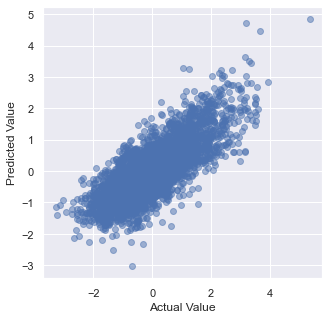

In [18]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value")

This actually looks like it has a decently linear relationship, with no drastic outliers.

### Normality

C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


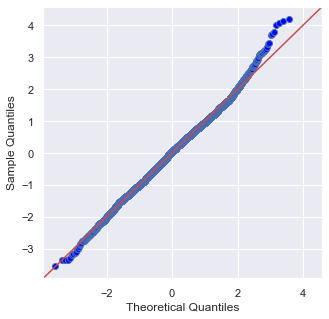

In [19]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Our model also does not violate the Normality assumption!

### Homoscedasticity

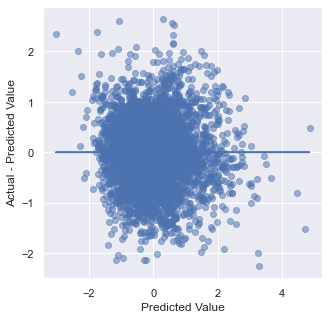

In [20]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Unfortunately, our model shows no Homoscedasticity at all. However, this could be caused by many different factors, and can be expected considering our model has only been trained with a 60% accuracy rate.

## Conclusions

This is not the strongest Linear Regression Model ever made. But it could certainly be used as a baseline predictor for assessing the value of homes in King County.

In [21]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living            0.619681
sqft_lot              -0.067267
yr_built              -0.253700
bedrooms_3            -0.311480
bedrooms_4            -0.392994
bedrooms_5            -0.422497
bedrooms_6            -0.571653
bathrooms_1_0         -0.014428
bathrooms_1_5         -0.094340
bathrooms_3_25         0.337696
bathrooms_3_5          0.336653
bathrooms_3_75         0.545982
floors_3_0             0.405360
renovated_2000_1       0.216783
grade_11_Excellent     1.102691
grade_12_Luxury        1.467648
grade_13_Mansion       2.138869
grade_4_Low           -0.718320
grade_5_Fair          -0.646318
grade_6_Low_Average   -0.420113
grade_8_Good           0.200854
grade_9_Better         0.550506
condition_Fair        -0.366898
condition_Very_Good    0.135876
view_EXCELLENT         0.557733
waterfront_YES         0.706356
Name: Coefficients, dtype: float64

Intercept: 0.15344756982654395


The above shows how our algorithm uses each feature to make determinations about the target price. The final steps we need to take are to determine whether our model holds to each of the assumptions of linear regression.

The most positively correlated features according to the model are sqft_living, waterfront, and view_excellent. This holds true to common assumptions of what would be of value in a house. However, there also is a negative correlation to things like grade_5_Fair, and bedrooms_6, which could be errors in the way our model was trained. 

### Next Steps
The reality is that there is a very broad range of factors that can influence any individual house sale. That being said, we could also explore more features based on commonplace observations. For example, our data contains information on when (in the case of our model, whether) each house was renovated, but not what elements of the house were renovated or what was changed about them. 

Additionally, we could run another analysis of the data using features like the grade, bathrooms, bedrooms, floors, etc. as continuous variables rather than categorical ones. This could lead to less cases like the one in which our model subtracts more value from a house for a 5("Fair") rating than a 4("Low") Rating. 

Furthermore, features like rating could use more exploration, and perhaps be removed from the dataset completely in future analyses.

We could also opt for a ground up approach, analyzing models trained on featuresets based on commonlplace assumptions about house values, instead of a purely data driven approach, which is prone to different kinds of errors.